In [26]:
!pip install pyjanitor pyvis --quiet

In [1]:
import pandas as pd
import janitor
import datetime

from IPython.core.display import display, HTML
from pyvis import network as net
import networkx as nx

C:\Users\CarolinaSoria\AppData\Local\Temp\ipykernel_22064\282497062.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
df = pd.read_csv("Connections.csv", skiprows=2)

In [4]:
df = (
    df
    .clean_names() # remove spacing and capitalization
    .drop(columns=['first_name', 'last_name', 'email_address']) # drop for privacy
    .dropna(subset=['company', 'position']) # drop missing values in company and position
    .to_datetime('connected_on', format='%d %b %Y')
  )
df.head()

c:\Users\CarolinaSoria\anaconda3\Lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.transform_columns` instead.
  return method(self._obj, *args, **kwargs)


,url,company,position,connected_on
0,https://www.linkedin.com/in/lukas-bigun-19149072,"Department of Finance, Copenhagen Business School",Research Assistant,2024-05-07
1,https://www.linkedin.com/in/lukas-mikkel-hanse...,Above Sports,Nordic Sales Lead,2024-04-26
2,https://www.linkedin.com/in/charlottelumbye,Capacit,Senior Business Consultant,2024-04-17
3,https://www.linkedin.com/in/mikkel-hempel,Capacit A/S,Co-Managing Partner,2024-04-12
4,https://www.linkedin.com/in/davidlyngh,INTELLISHORE,People & Culture Lead,2024-04-12


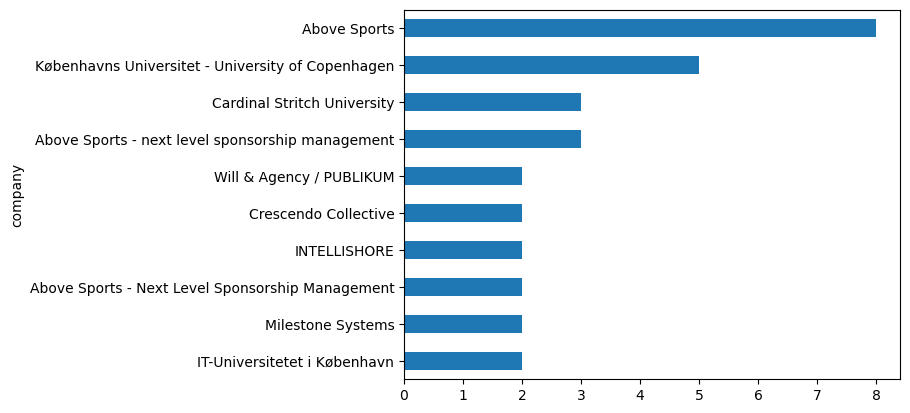

In [5]:
df['company'].value_counts().head(10).plot(kind="barh").invert_yaxis();

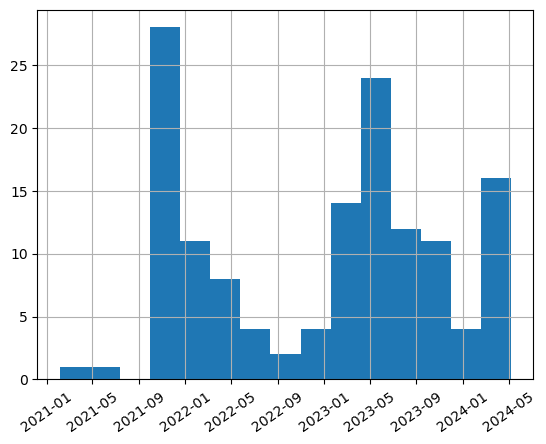

In [6]:
df['connected_on'].hist(xrot=35, bins=15);

In [7]:
df_company = df['company'].value_counts().reset_index()
df_company.columns = ['company', 'count']
df_company = df_company.sort_values(by="count", ascending=False)
df_company.head(20)

,company,count
0,Above Sports,8
1,Københavns Universitet - University of Copenhagen,5
2,Cardinal Stritch University,3
3,Above Sports - next level sponsorship management,3
4,Will & Agency / PUBLIKUM,2
5,Crescendo Collective,2
6,INTELLISHORE,2
7,Above Sports - Next Level Sponsorship Management,2
8,Milestone Systems,2
9,IT-Universitetet i København,2


In [25]:
G = nx.Graph()
for _, row in df_company.iterrows():
# store company name and count
  company = row['company']
  count = row['count']
  G.add_node(company, size=count)
  G.add_edge(company, count, weight=count)

G.remove_edges_from(nx.selfloop_edges(G))

In [26]:
count

1

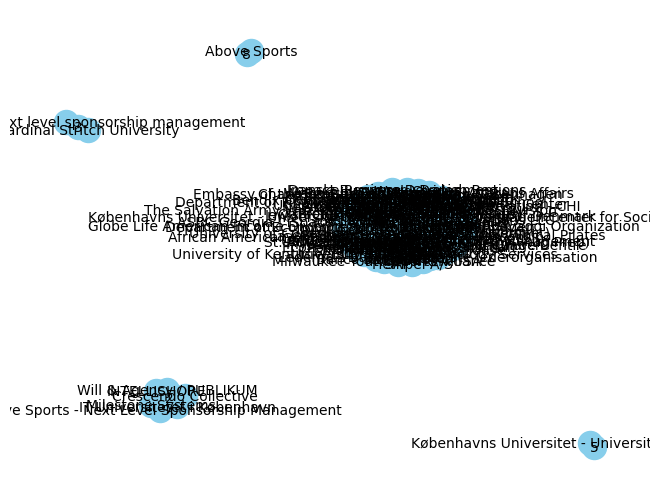

In [27]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G)  # You can choose a different layout algorithm
nx.draw(G, pos, with_labels=True, node_color='skyblue', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): str(d['weight']) for u, v, d in G.edges(data=True)})
plt.show()

In [14]:
print(f"number of nodes: {g.number_of_nodes()}")
print(f"number of edges: {g.number_of_edges()}")

number of nodes: 3
number of edges: 2


In [32]:
from pyvis.network import Network

In [33]:
got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")
for _, row in df_company.iterrows():
# store company name and count
  company = row['company']
  count = row['count']
  net.add_node(company, label=company, size=count)
  nt = Network('500px', '500px')

  # populates the nodes and edges data structures
  nt.show('nx.html')

got_net.show("graph_1.html")

nx.html


AttributeError: 'NoneType' object has no attribute 'render'